### ARIMA and Seasonal ARIMA

#### Autoregressive Integrates Moving Averages

The general process for ARIMA models is the following:

- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Use the model to make predictions


### Imports

In [182]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Testing For Stationarity
import statsmodels.api as sm
import pmdarima as pm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal

### Initial Analysis

In [4]:
df = pd.read_csv('DailyDelhiClimateTest.csv')

In [5]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [6]:
df.tail()

,date,meantemp,humidity,wind_speed,meanpressure
109,2017-04-20,34.500,27.500000,5.562500,998.625000
110,2017-04-21,34.250,39.375000,6.962500,999.875000
111,2017-04-22,32.900,40.900000,8.890000,1001.600000
112,2017-04-23,32.875,27.500000,9.962500,1002.125000
113,2017-04-24,32.000,27.142857,12.157143,1004.142857


In [7]:
# Check for null values

df.isnull().values.any()

False

In [8]:
# Describe the values

df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


### Visualizations

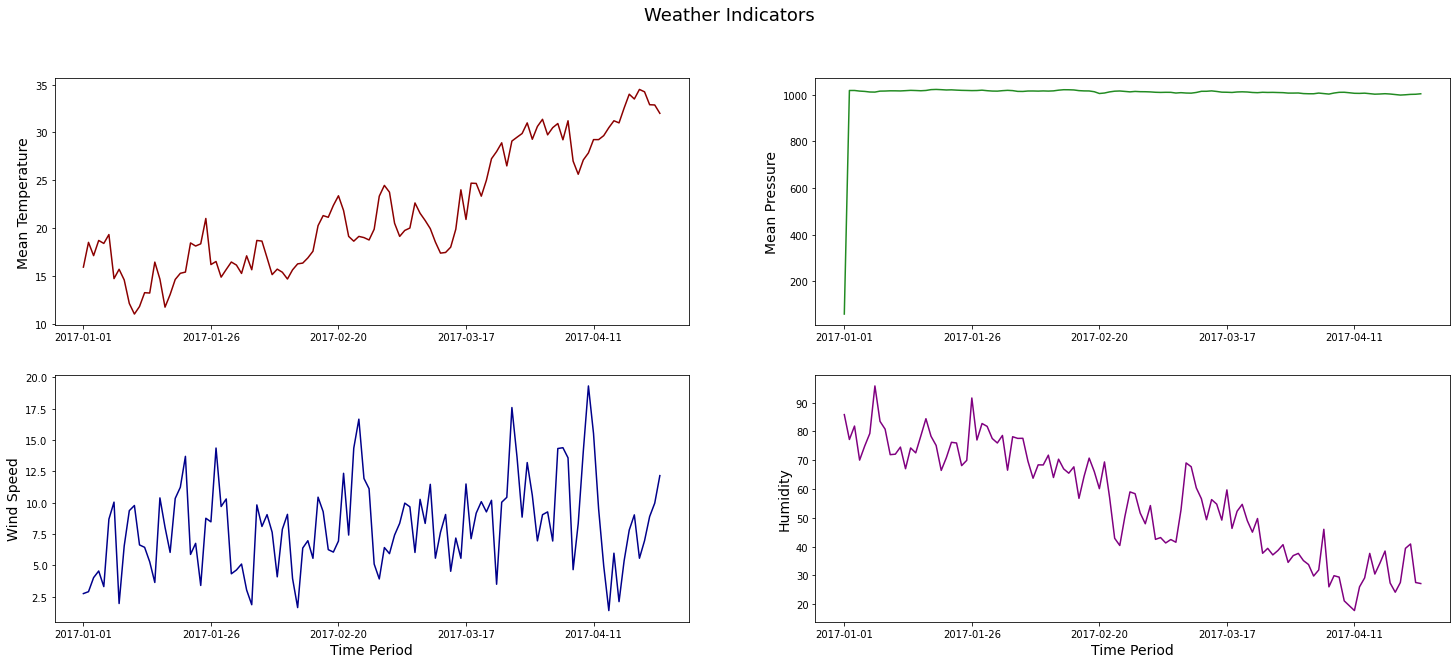

In [355]:
# Mean Temperature

fig,ax = plt.subplots(2,2, figsize=(25,10))
fig.suptitle('Weather Indicators',fontsize=18)

ax[0,0].plot(df['date'],df['meantemp'],color='darkred')
ax[0,0].set_ylabel('Mean Temperature',fontsize=14)
# ax[0,0].set_xlabel('Time Period',fontsize=14)
ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(5))

ax[0,1].plot(df['date'],df['meanpressure'],color='forestgreen')
ax[0,1].set_ylabel('Mean Pressure',fontsize=14)
# ax[0,1].set_xlabel('Time Period',fontsize=14)
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(5))

ax[1,0].plot(df['date'],df['wind_speed'],color='darkblue')
ax[1,0].set_ylabel('Wind Speed',fontsize=14)
ax[1,0].set_xlabel('Time Period',fontsize=14)
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(5))

ax[1,1].plot(df['date'],df['humidity'],color='purple')
ax[1,1].set_ylabel('Humidity',fontsize=14)
ax[1,1].set_xlabel('Time Period',fontsize=14)
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(5))


plt.show()

### Stationary test on Mean Temperature

In [13]:
# Augmented Dickey-Fuller (ADF) Test

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(series):
    result=adfuller(series)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [14]:
adfuller_test(df['meantemp'])

ADF Test Statistic : -1.096474275875619
p-value : 0.7164758731775932
#Lags Used : 0
Number of Observations Used : 113
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
# Differencing

df['Mean Temp Diff'] = df['meantemp'] - df['meantemp'].shift(10)
df.head(10)

In [21]:
# Again Augmented Dickey-Fuller (ADF) Test

adfuller_test(df['Mean Temp Diff'].dropna())

ADF Test Statistic : -3.040768364367674
p-value : 0.03125859409562775
#Lags Used : 10
Number of Observations Used : 93
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


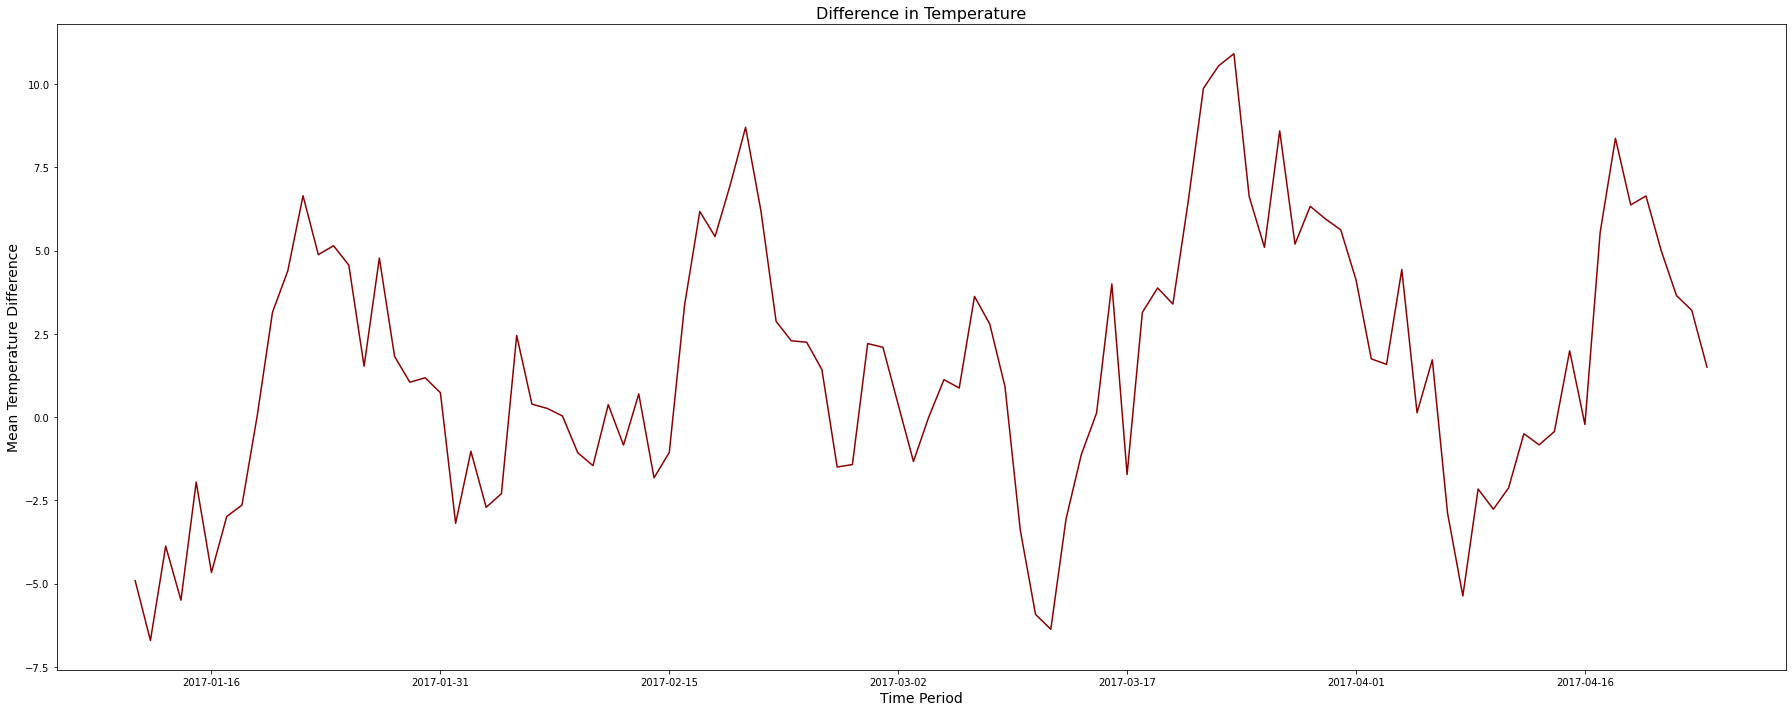

In [336]:
# Mean Temperature Difference

fig,ax = plt.subplots(figsize=(25,10))
plt.plot(df['date'],df['Mean Temp Diff'],color='darkred')

plt.ylabel('Mean Temperature Difference',fontsize=14)
plt.xlabel('Time Period',fontsize=14)
plt.title('Difference in Temperature',fontsize=16)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

### Stationary Test on Mean Pressure

In [24]:
# Augmented Dickey-Fuller (ADF) Test

adfuller_test(df['meanpressure'])

ADF Test Statistic : -2.182219693817165
p-value : 0.2127618516680096
#Lags Used : 2
Number of Observations Used : 111
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [32]:
# Differencing

df['Mean Pressure Diff'] = df['meanpressure'].shift(1) - df['meanpressure'].shift(2)
df.head(10)

,date,meantemp,humidity,wind_speed,meanpressure,Mean Temp Diff,Mean Pressure Diff
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,NaN,NaN
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,NaN,NaN
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN,959.277778
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN,0.055556
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN,-2.633333
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727,NaN,-1.366667
6,2017-01-07,14.708333,95.833333,10.041667,1011.375000,NaN,-2.560606
7,2017-01-08,15.684211,83.526316,1.950000,1015.550000,NaN,-0.397727
8,2017-01-09,14.571429,80.809524,6.542857,1015.952381,NaN,4.175000
9,2017-01-10,12.111111,71.944444,9.361111,1016.888889,NaN,0.402381


In [33]:
# Again Augmented Dickey-Fuller (ADF) Test

adfuller_test(df['Mean Pressure Diff'].dropna())

ADF Test Statistic : -8.18190337092458
p-value : 8.089029410175499e-13
#Lags Used : 1
Number of Observations Used : 110
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


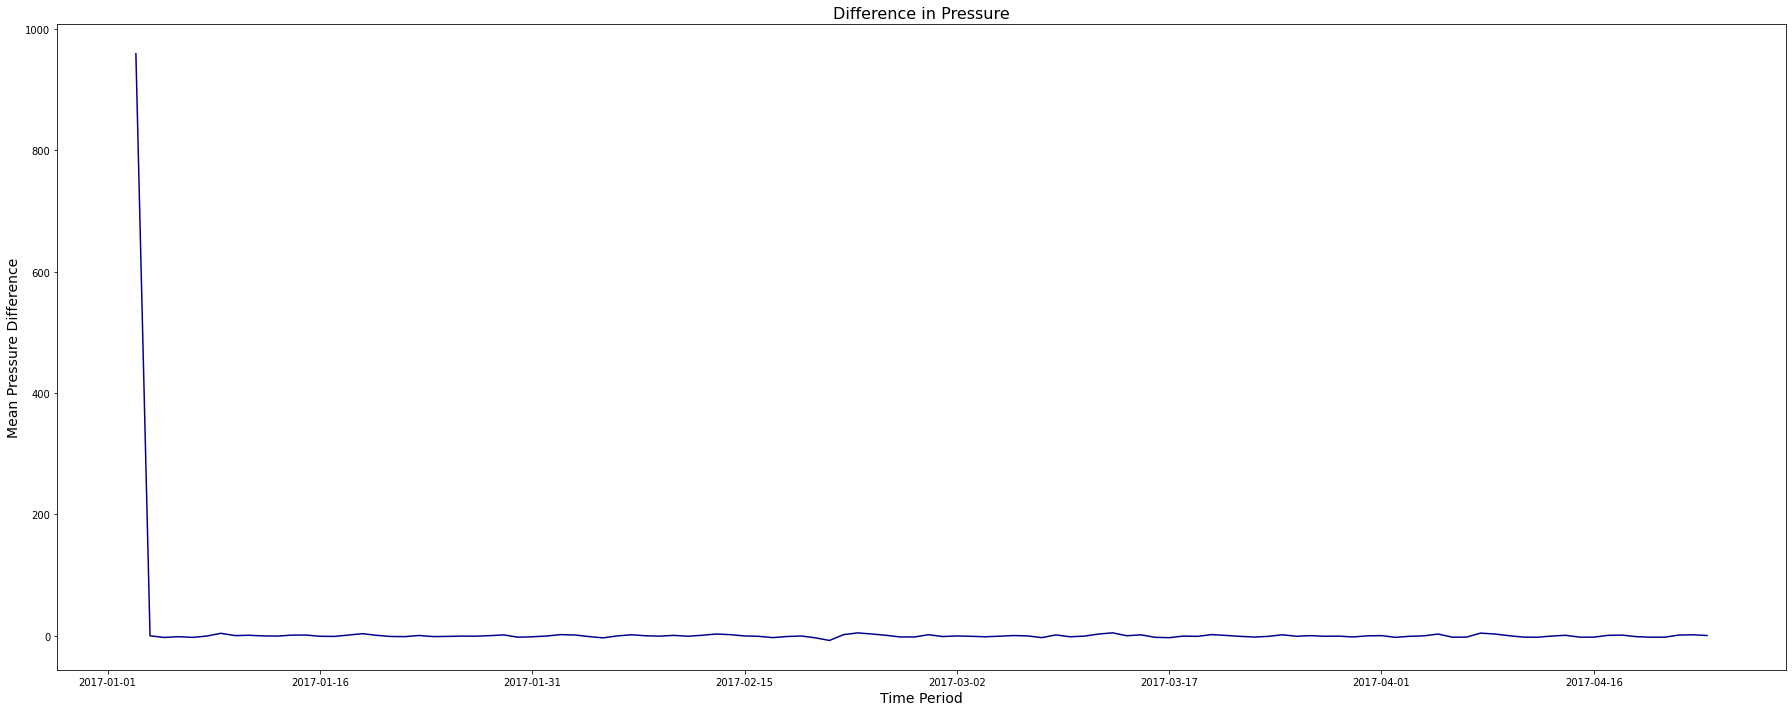

In [337]:
# Mean Pressure Difference

fig,ax = plt.subplots(figsize=(25,10))
plt.plot(df['date'],df['Mean Pressure Diff'],color='darkblue')

plt.ylabel('Mean Pressure Difference',fontsize=14)
plt.xlabel('Time Period',fontsize=14)
plt.title('Difference in Pressure',fontsize=16)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

### Stationary Test on Humidity

In [36]:
# Augmented Dickey-Fuller (ADF) Test
adfuller_test(df['humidity'])

ADF Test Statistic : -0.6757281773610532
p-value : 0.8529367219992412
#Lags Used : 7
Number of Observations Used : 106
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [39]:
# Differencing

df['Humidity Diff'] = df['humidity'] - df['humidity'].shift(10)
df.head(10)

,date,meantemp,humidity,wind_speed,meanpressure,Mean Temp Diff,Mean Pressure Diff,Humidity Diff
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,NaN,NaN,NaN
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,NaN,NaN,NaN
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN,959.277778,NaN
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN,0.055556,NaN
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN,-2.633333,NaN
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727,NaN,-1.366667,NaN
6,2017-01-07,14.708333,95.833333,10.041667,1011.375000,NaN,-2.560606,NaN
7,2017-01-08,15.684211,83.526316,1.950000,1015.550000,NaN,-0.397727,NaN
8,2017-01-09,14.571429,80.809524,6.542857,1015.952381,NaN,4.175000,NaN
9,2017-01-10,12.111111,71.944444,9.361111,1016.888889,NaN,0.402381,NaN


In [40]:
# Again Augmented Dickey-Fuller (ADF) Test

adfuller_test(df['Humidity Diff'].dropna())

ADF Test Statistic : -3.0687320351744924
p-value : 0.028955370737303348
#Lags Used : 10
Number of Observations Used : 93
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


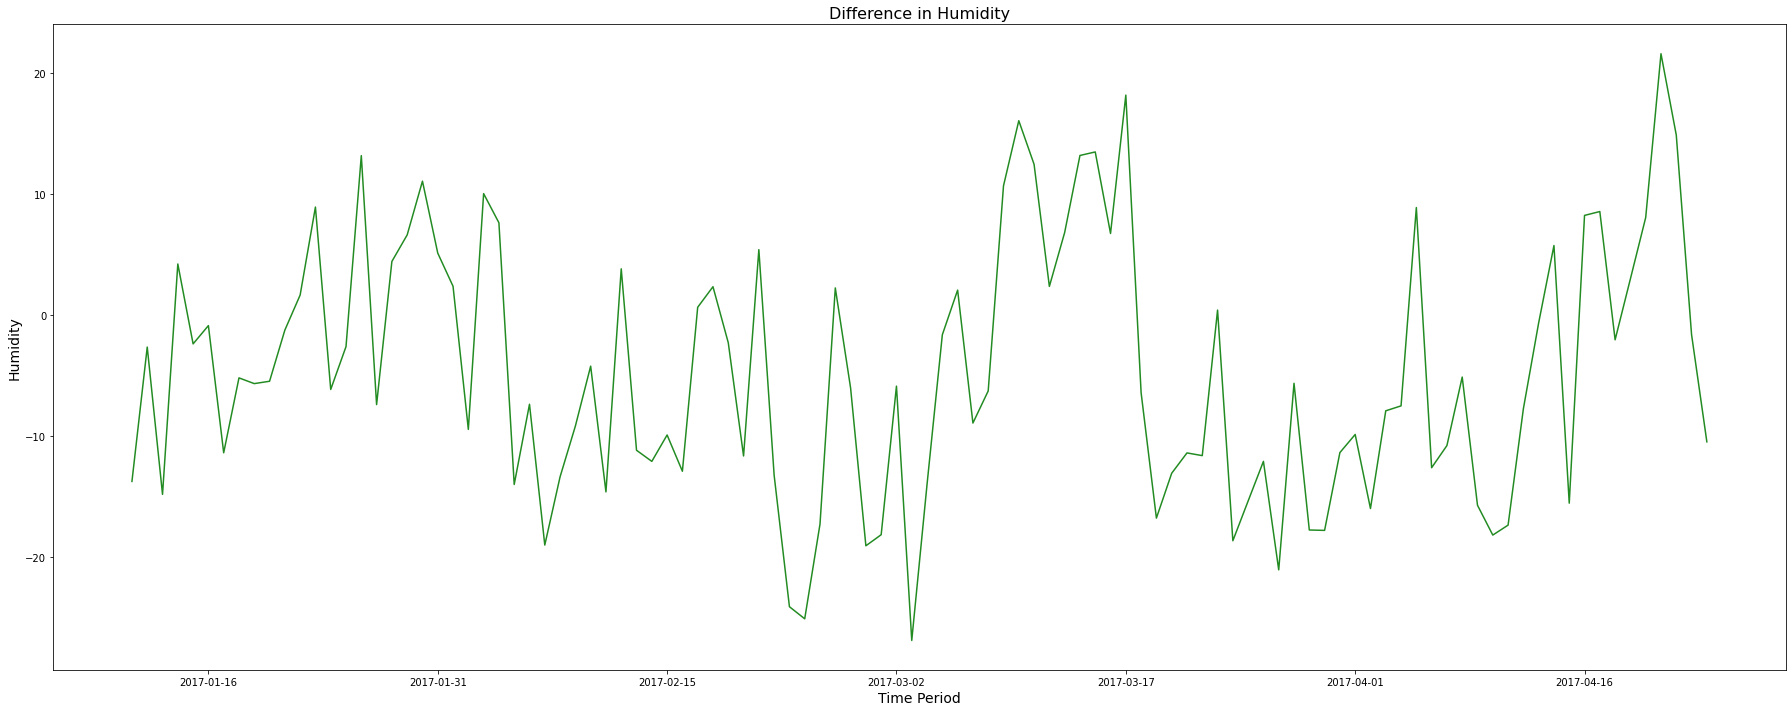

In [338]:
# Humidity Difference

fig,ax = plt.subplots(figsize=(25,10))
plt.plot(df['date'],df['Humidity Diff'],color='forestgreen')

plt.ylabel('Humidity',fontsize=14)
plt.xlabel('Time Period',fontsize=14)
plt.title('Difference in Humidity',fontsize=16)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

### Stationary Test on Wind Speed

In [43]:
# Augmented Dickey-Fuller (ADF) Test
adfuller_test(df['wind_speed'])

ADF Test Statistic : -6.518055277669119
p-value : 1.0590893293993272e-08
#Lags Used : 0
Number of Observations Used : 113
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [356]:
df['Wind Diff'] = df['wind_speed'] - df['wind_speed'].shift(1)
df.head(10)

,date,meantemp,humidity,wind_speed,meanpressure,Mean Temp Diff,Mean Pressure Diff,Humidity Diff,temp forecast,Wind Diff
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,NaN,NaN,NaN,NaN,0.150966
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN,959.277778,NaN,NaN,1.122222
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN,0.055556,NaN,NaN,0.528333
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN,-2.633333,NaN,NaN,-1.245000
5,2017-01-06,19.318182,79.318182,8.681818,1011.772727,NaN,-1.366667,NaN,NaN,5.381818
6,2017-01-07,14.708333,95.833333,10.041667,1011.375000,NaN,-2.560606,NaN,NaN,1.359848
7,2017-01-08,15.684211,83.526316,1.950000,1015.550000,NaN,-0.397727,NaN,NaN,-8.091667
8,2017-01-09,14.571429,80.809524,6.542857,1015.952381,NaN,4.175000,NaN,NaN,4.592857
9,2017-01-10,12.111111,71.944444,9.361111,1016.888889,NaN,0.402381,NaN,NaN,2.818254


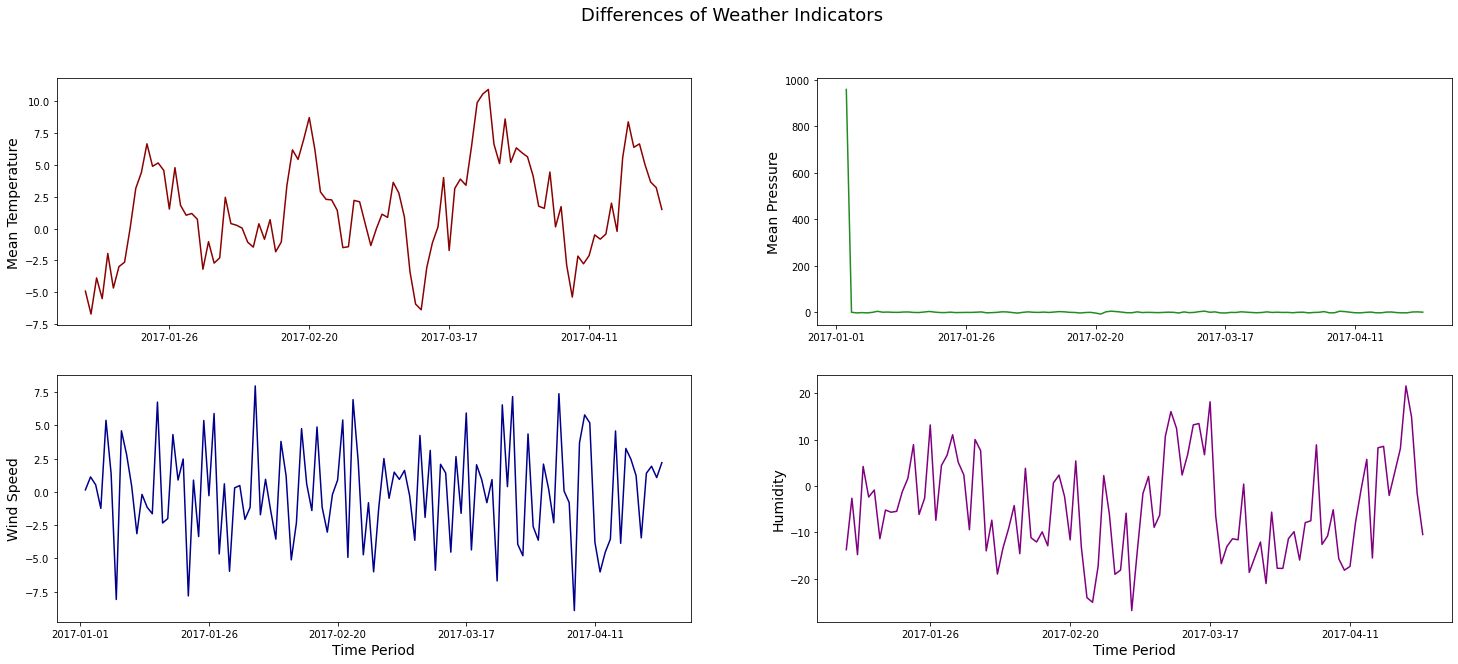

In [357]:
# Mean Temperature

fig,ax = plt.subplots(2,2, figsize=(25,10))
fig.suptitle('Differences of Weather Indicators',fontsize=18)

ax[0,0].plot(df['date'],df['Mean Temp Diff'],color='darkred')
ax[0,0].set_ylabel('Mean Temperature',fontsize=14)
# ax[0,0].set_xlabel('Time Period',fontsize=14)
ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(5))

ax[0,1].plot(df['date'],df['Mean Pressure Diff'],color='forestgreen')
ax[0,1].set_ylabel('Mean Pressure',fontsize=14)
# ax[0,1].set_xlabel('Time Period',fontsize=14)
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(5))

ax[1,0].plot(df['date'],df['Wind Diff'],color='darkblue')
ax[1,0].set_ylabel('Wind Speed',fontsize=14)
ax[1,0].set_xlabel('Time Period',fontsize=14)
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(5))

ax[1,1].plot(df['date'],df['Humidity Diff'],color='purple')
ax[1,1].set_ylabel('Humidity',fontsize=14)
ax[1,1].set_xlabel('Time Period',fontsize=14)
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(5))


plt.show()

### Auto Regressive Model on Temperature

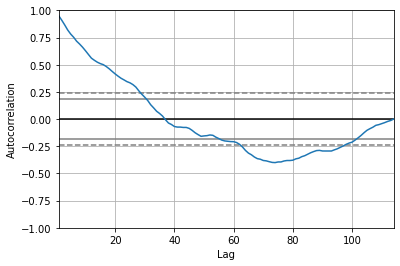

In [47]:
# Autocorrelation Plot 

autocorrelation_plot(df['meantemp'])
plt.show()

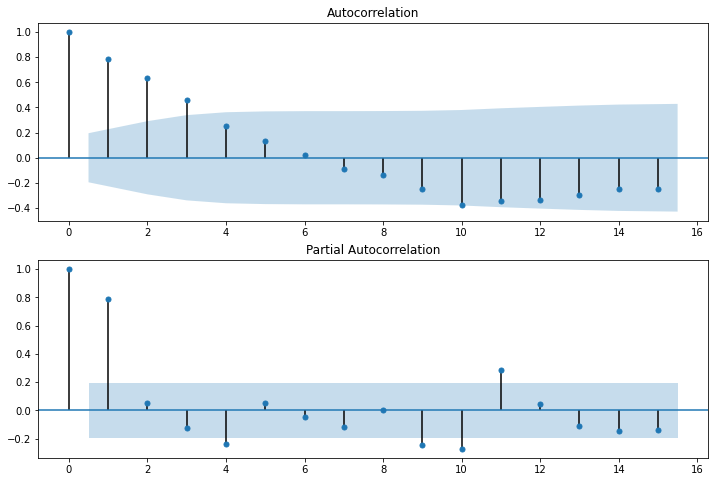

In [76]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Mean Temp Diff'].iloc[13:],lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Mean Temp Diff'].iloc[13:],lags=15,ax=ax2)

In [292]:
# Create column for forecast
df['temp forecast'] = np.nan

# Get future dates

future_dates=[pd.Timestamp(df['date'][df.index[-1]])+ DateOffset(day=x+25) for x in range(0,6)]
future_dates.append(future_dates[-1]+ DateOffset(day=1)+DateOffset(months=1))
future_dates2 = ([future_dates[-1]+ DateOffset(day=x) for x in range(2,16)])
future_dates += future_dates2

future_data_df = pd.DataFrame(columns=df.columns)
future_data_df['date'] = future_dates
future_data_df['date']= future_data_df['date'].astype(str)

### ARIMA Model

In [350]:
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(df['meantemp'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

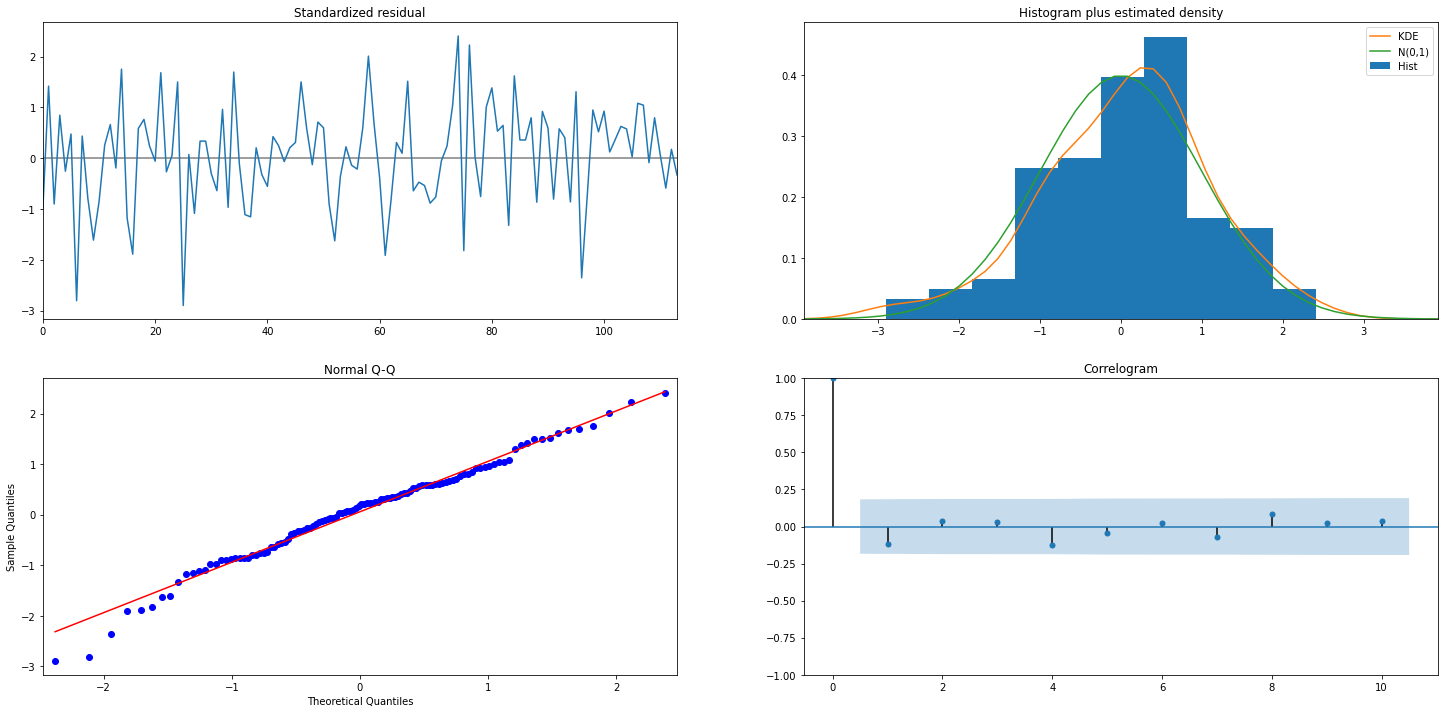

In [351]:
ARIMA_model.plot_diagnostics(figsize=(25,12))
plt.show()

In [352]:
fitted, confint = ARIMA_model.predict(n_periods=21, return_conf_int=True,exogenous=future_data_df[['date']])

future_data_df['temp forecast'] = list(fitted)

In [353]:
future_df=pd.concat([df,future_data_df])
future_df

,date,meantemp,humidity,wind_speed,meanpressure,Mean Temp Diff,Mean Pressure Diff,Humidity Diff,temp forecast
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,NaN,NaN,NaN,NaN
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,NaN,NaN,NaN,NaN
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN,959.277778,NaN,NaN
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN,0.055556,NaN,NaN
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN,-2.633333,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16,2017-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.074451
17,2017-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.902422
18,2017-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.735711
19,2017-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.574152


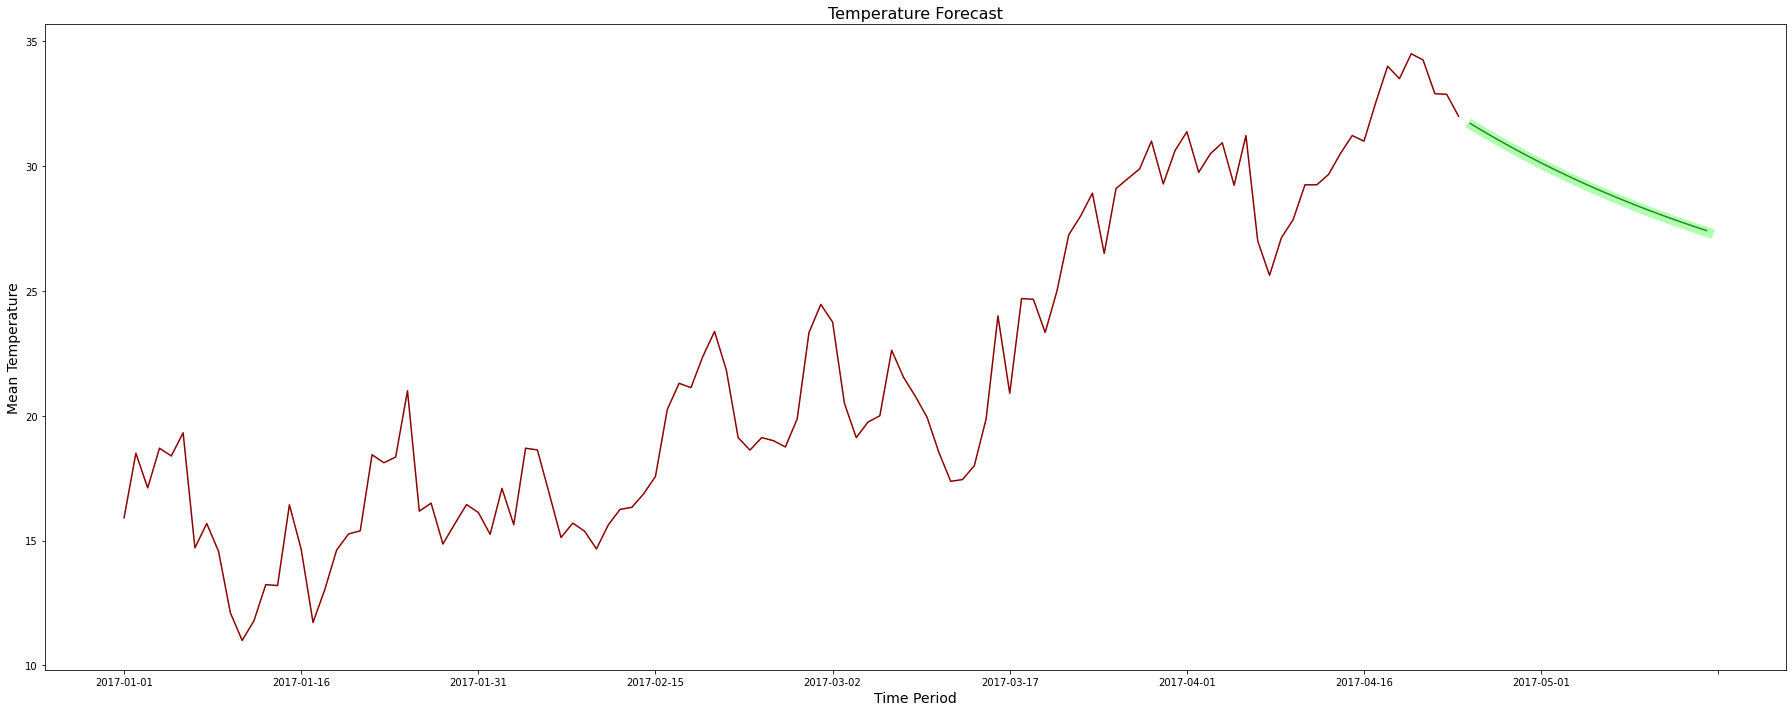

In [354]:
fig,ax = plt.subplots(figsize=(25,10))

plt.plot(future_df['date'] ,future_df["meantemp"],color='darkred')
plt.plot(future_df['date'] ,future_df["temp forecast"], color='forestgreen',path_effects=[SimpleLineShadow(shadow_color="lime", linewidth=10),Normal()])

plt.ylabel('Mean Temperature',fontsize=14)
plt.xlabel('Time Period',fontsize=14)
plt.title('Temperature Forecast',fontsize=16)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

### SARIMA Model

In [307]:
SARIMA_model = pm.auto_arima(df[['meantemp']], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

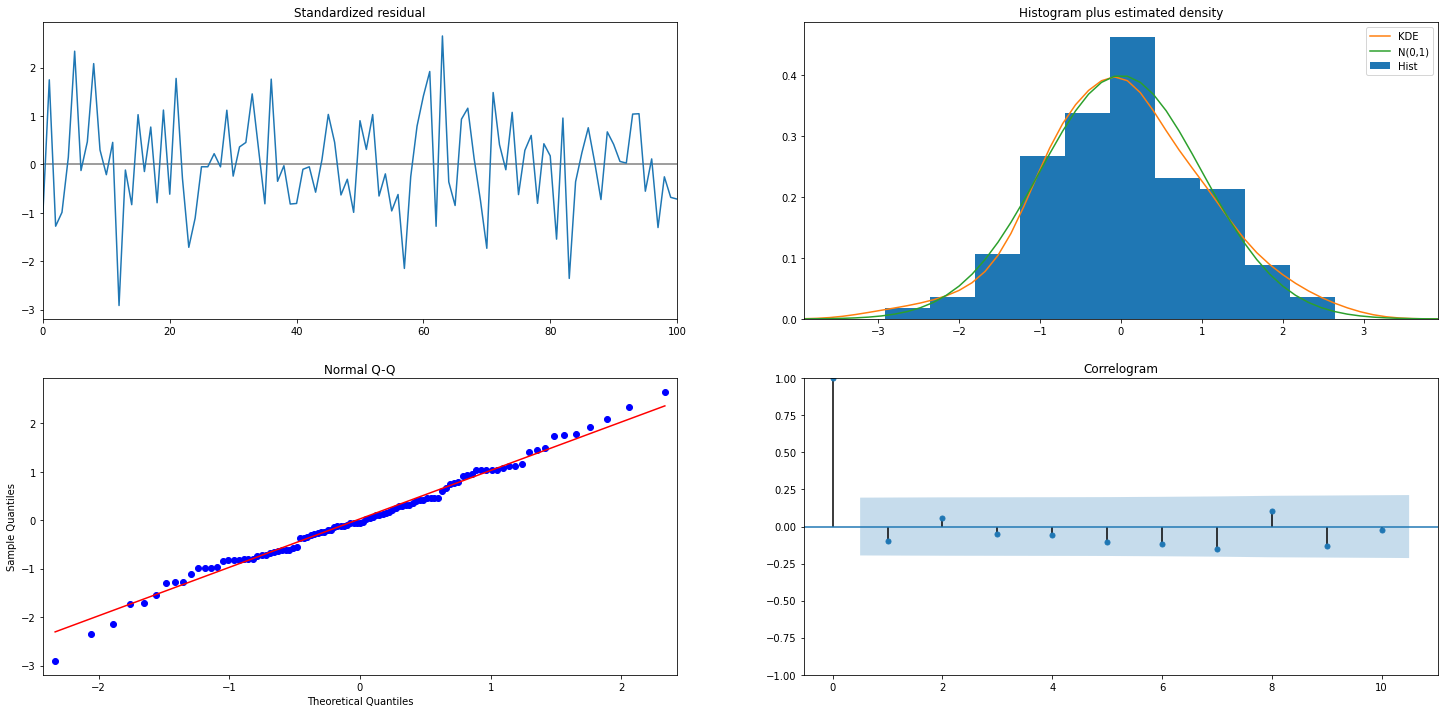

In [309]:
SARIMA_model.plot_diagnostics(figsize=(25,12))
plt.show()

In [310]:
fitted, confint = SARIMA_model.predict(n_periods=21, return_conf_int=True,exogenous=future_data_df[['date']])

future_data_df['temp forecast'] = list(fitted)

In [311]:
future_df=pd.concat([df,future_data_df])
future_df

,date,meantemp,humidity,wind_speed,meanpressure,Mean Temp Diff,Mean Pressure Diff,Humidity Diff,temp forecast
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,NaN,NaN,NaN,NaN
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,NaN,NaN,NaN,NaN
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN,959.277778,NaN,NaN
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN,0.055556,NaN,NaN
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN,-2.633333,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16,2017-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.569572
17,2017-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.011762
18,2017-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.821367
19,2017-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.553038


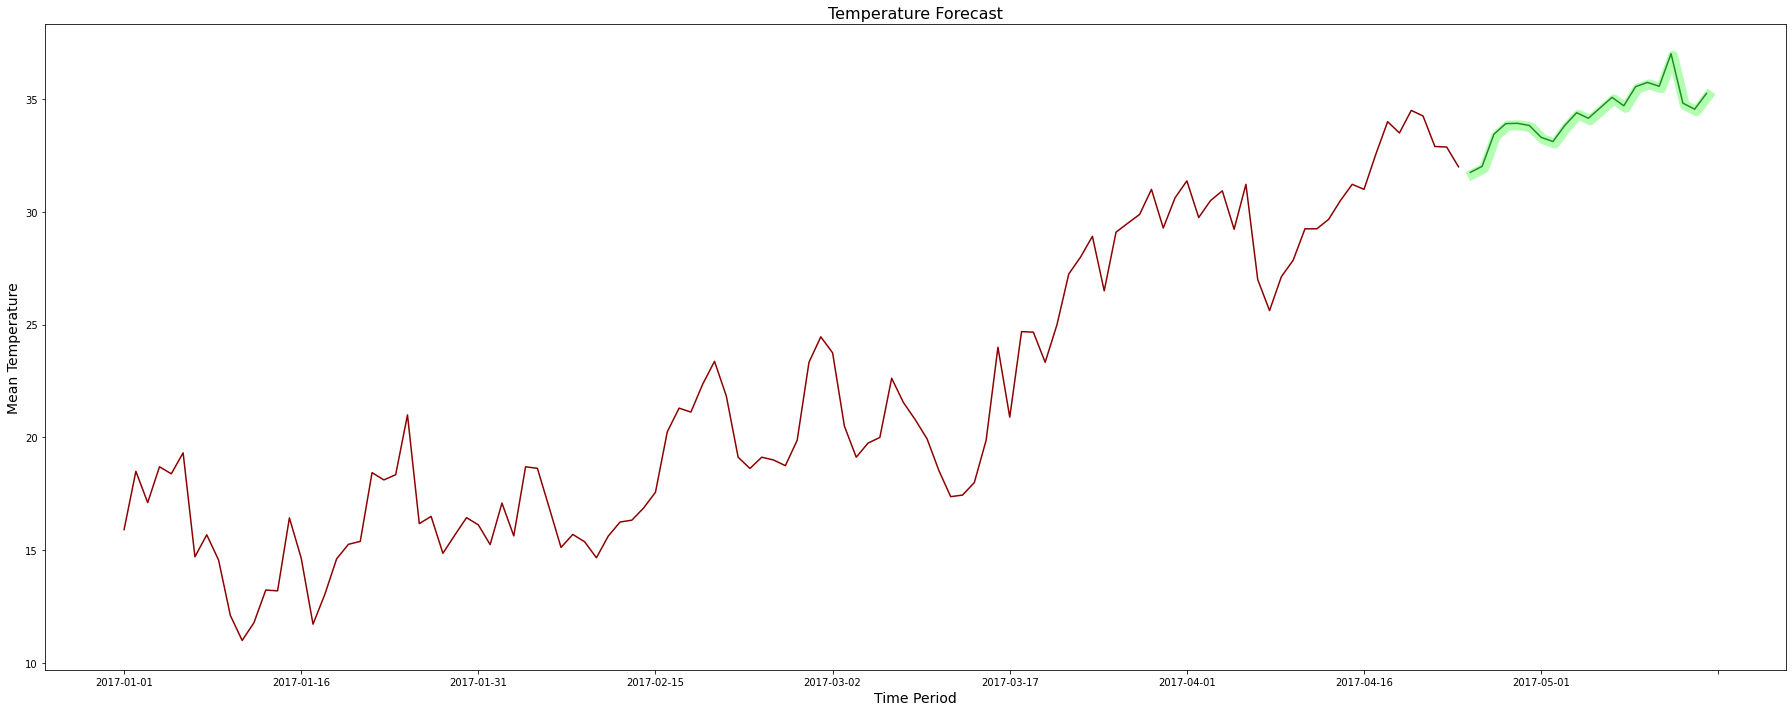

In [347]:
fig,ax = plt.subplots(figsize=(25,10))

plt.plot(future_df['date'] ,future_df["meantemp"],color='darkred')
plt.plot(future_df['date'] ,future_df["temp forecast"], color='forestgreen',path_effects=[SimpleLineShadow(shadow_color="lime", linewidth=10),Normal()])

plt.ylabel('Mean Temperature',fontsize=14)
plt.xlabel('Time Period',fontsize=14)
plt.title('Temperature Forecast',fontsize=16)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

### SARIMA Model

In [293]:
SARIMAX_model = pm.auto_arima(df[['meantemp']], exogenous=df[['date']], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

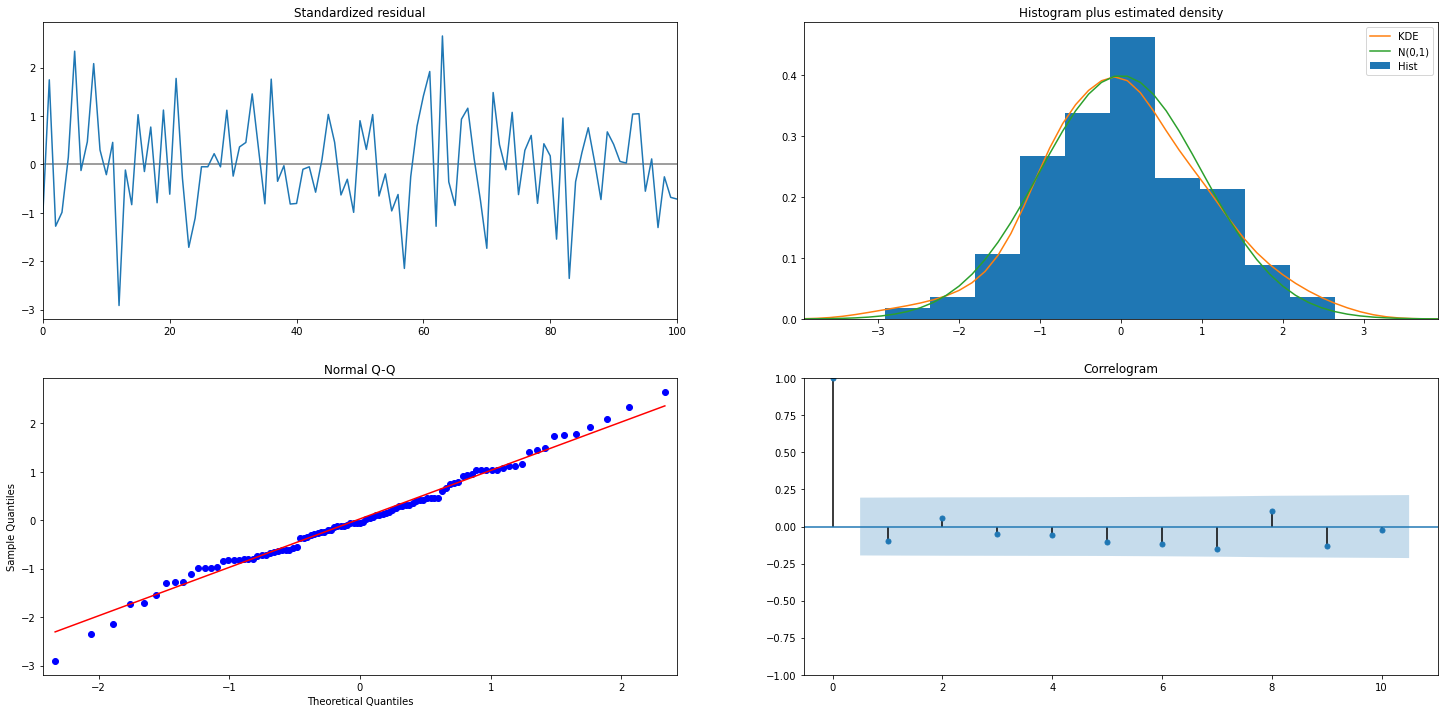

In [313]:
SARIMAX_model.plot_diagnostics(figsize=(25,12))
plt.show()

In [295]:
fitted, confint = SARIMAX_model.predict(n_periods=21, return_conf_int=True,exogenous=future_data_df[['date']])

future_data_df['temp forecast'] = list(fitted)

In [296]:
future_df=pd.concat([df,future_data_df])
future_df

,date,meantemp,humidity,wind_speed,meanpressure,Mean Temp Diff,Mean Pressure Diff,Humidity Diff,temp forecast
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,NaN,NaN,NaN,NaN
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,NaN,NaN,NaN,NaN
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,NaN,959.277778,NaN,NaN
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,NaN,0.055556,NaN,NaN
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,NaN,-2.633333,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16,2017-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.569572
17,2017-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.011762
18,2017-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.821367
19,2017-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.553038


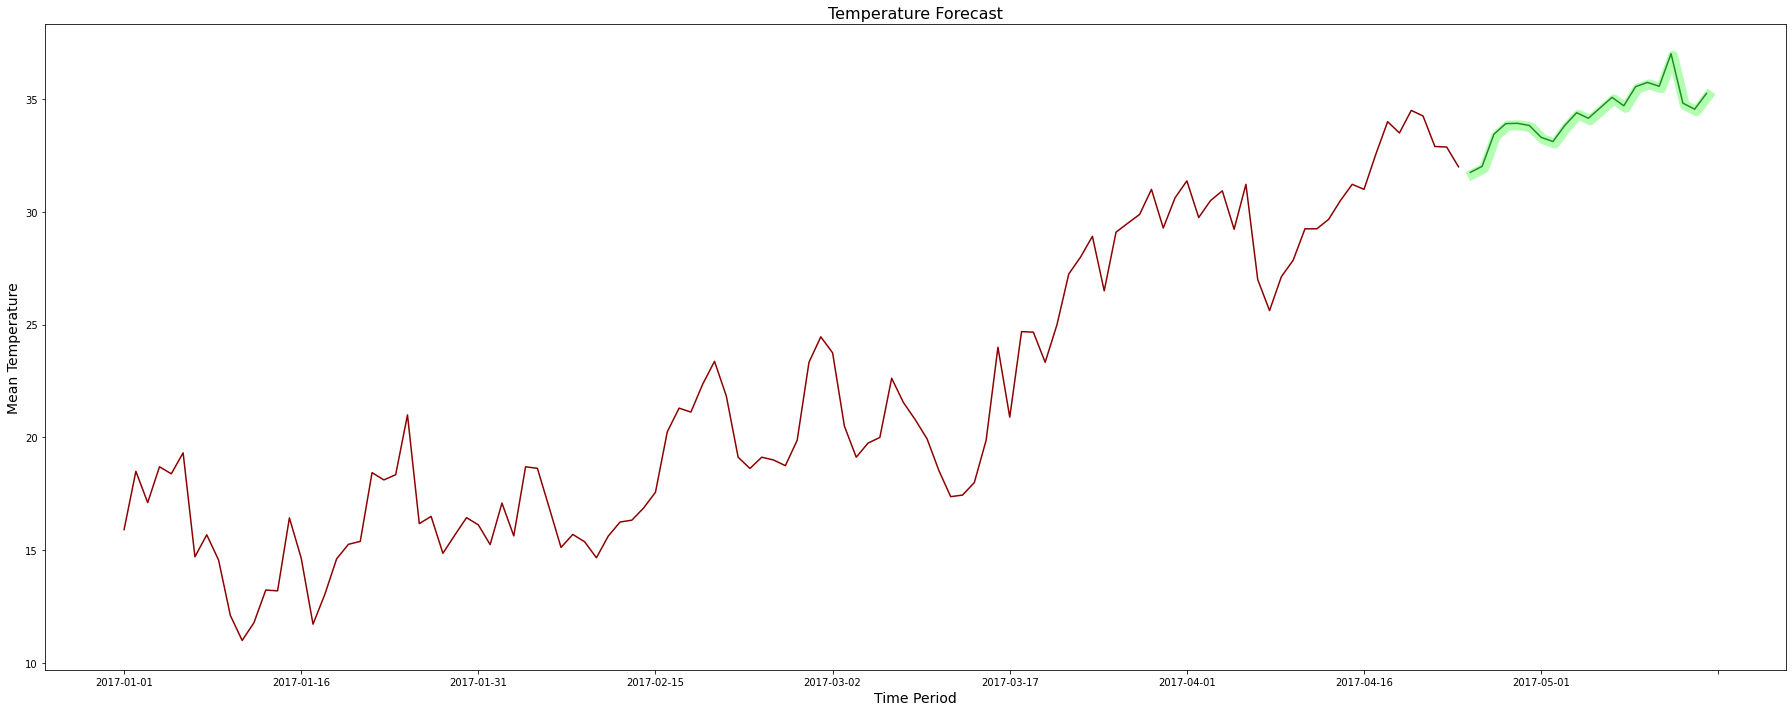

In [349]:
fig,ax = plt.subplots(figsize=(25,10))

plt.plot(future_df['date'] ,future_df["meantemp"],color='darkred')
plt.plot(future_df['date'] ,future_df["temp forecast"], color='forestgreen',path_effects=[SimpleLineShadow(shadow_color="lime", linewidth=10),Normal()])

plt.ylabel('Mean Temperature',fontsize=14)
plt.xlabel('Time Period',fontsize=14)
plt.title('Temperature Forecast',fontsize=16)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()